## Promedios

### Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

### Data

In [2]:
df_aerolinea = pd.read_csv("/home/daniel/Drive WLS/Cursos/machine-learning/series_de_tiempo/Data/AirPassengers.csv", index_col="Month")
df_aerolinea= df_aerolinea.rename(columns={"#Passengers": "Passengers"})
df_aerolinea.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


### Transformación

In [3]:
df_aerolinea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


In [4]:
df_aerolinea.isnull().sum()

Passengers    0
dtype: int64

In [5]:
df_aerolinea.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [6]:
df_aerolinea.index = pd.to_datetime(df_aerolinea.index)

In [7]:
df_aerolinea.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

## Promedio movil Simple (PMS)

In [8]:
df_aerolinea["PSM6"]=df_aerolinea["Passengers"].rolling(window=6).mean()

In [9]:
df_aerolinea.head(10)

,Passengers,PSM6
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,124.500000
1949-07-01,148,130.500000
1949-08-01,148,135.500000
1949-09-01,136,136.166667


In [10]:
df_aerolinea["PSM12"]=df_aerolinea["Passengers"].rolling(window=12).mean()

In [11]:
df_aerolinea.head(24)

,Passengers,PSM6,PSM12
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


<Axes: xlabel='Month'>

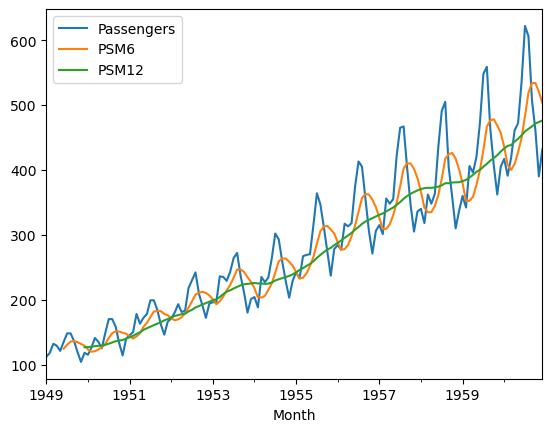

In [12]:
df_aerolinea.plot()

## Promedio Ponderado Exponencial (PPE)

In [13]:
df_aerolinea["PPE12"] = df_aerolinea["Passengers"].ewm(span=12).mean()

In [14]:
df_aerolinea.head(24)

,Passengers,PSM6,PSM12,PPE12
Month,,,,
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,115.250000
1949-03-01,132,NaN,NaN,121.787529
1949-04-01,129,NaN,NaN,124.064224
1949-05-01,121,NaN,NaN,123.231685
1949-06-01,135,124.500000,NaN,126.092005
1949-07-01,148,130.500000,NaN,130.980697
1949-08-01,148,135.500000,NaN,134.532364
1949-09-01,136,136.166667,NaN,134.822714


<Axes: xlabel='Month'>

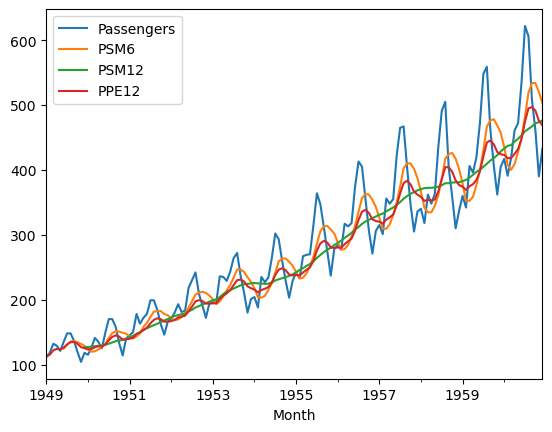

In [15]:
df_aerolinea.plot()

In [18]:
df_aerolinea["PPE6"] = df_aerolinea["Passengers"].ewm(span=6).mean()
df_aerolinea.head(24)

,Passengers,PSM6,PSM12,PPE12,PPE6
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,115.500000,115.500000
1949-03-01,132,NaN,NaN,122.917431,122.917431
1949-04-01,129,NaN,NaN,125.266892,125.266892
1949-05-01,121,NaN,NaN,123.769332,123.769332
1949-06-01,135,124.500000,NaN,127.469517,127.469517
1949-07-01,148,130.500000,NaN,133.950151,133.950151
1949-08-01,148,135.500000,NaN,138.256171,138.256171
1949-09-01,136,136.166667,NaN,137.578764,137.578764


<Axes: xlabel='Month'>

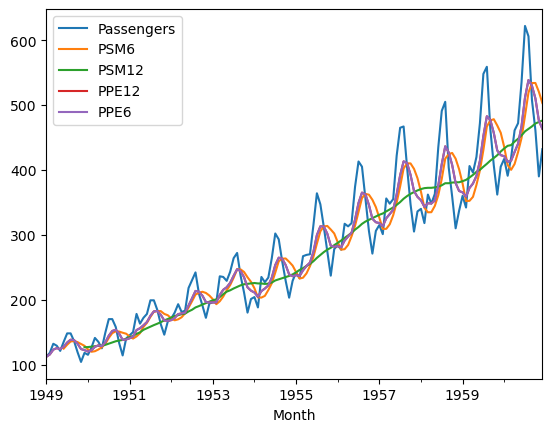

In [19]:
df_aerolinea.plot()

/tmp/ipykernel_61737/3702954804.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


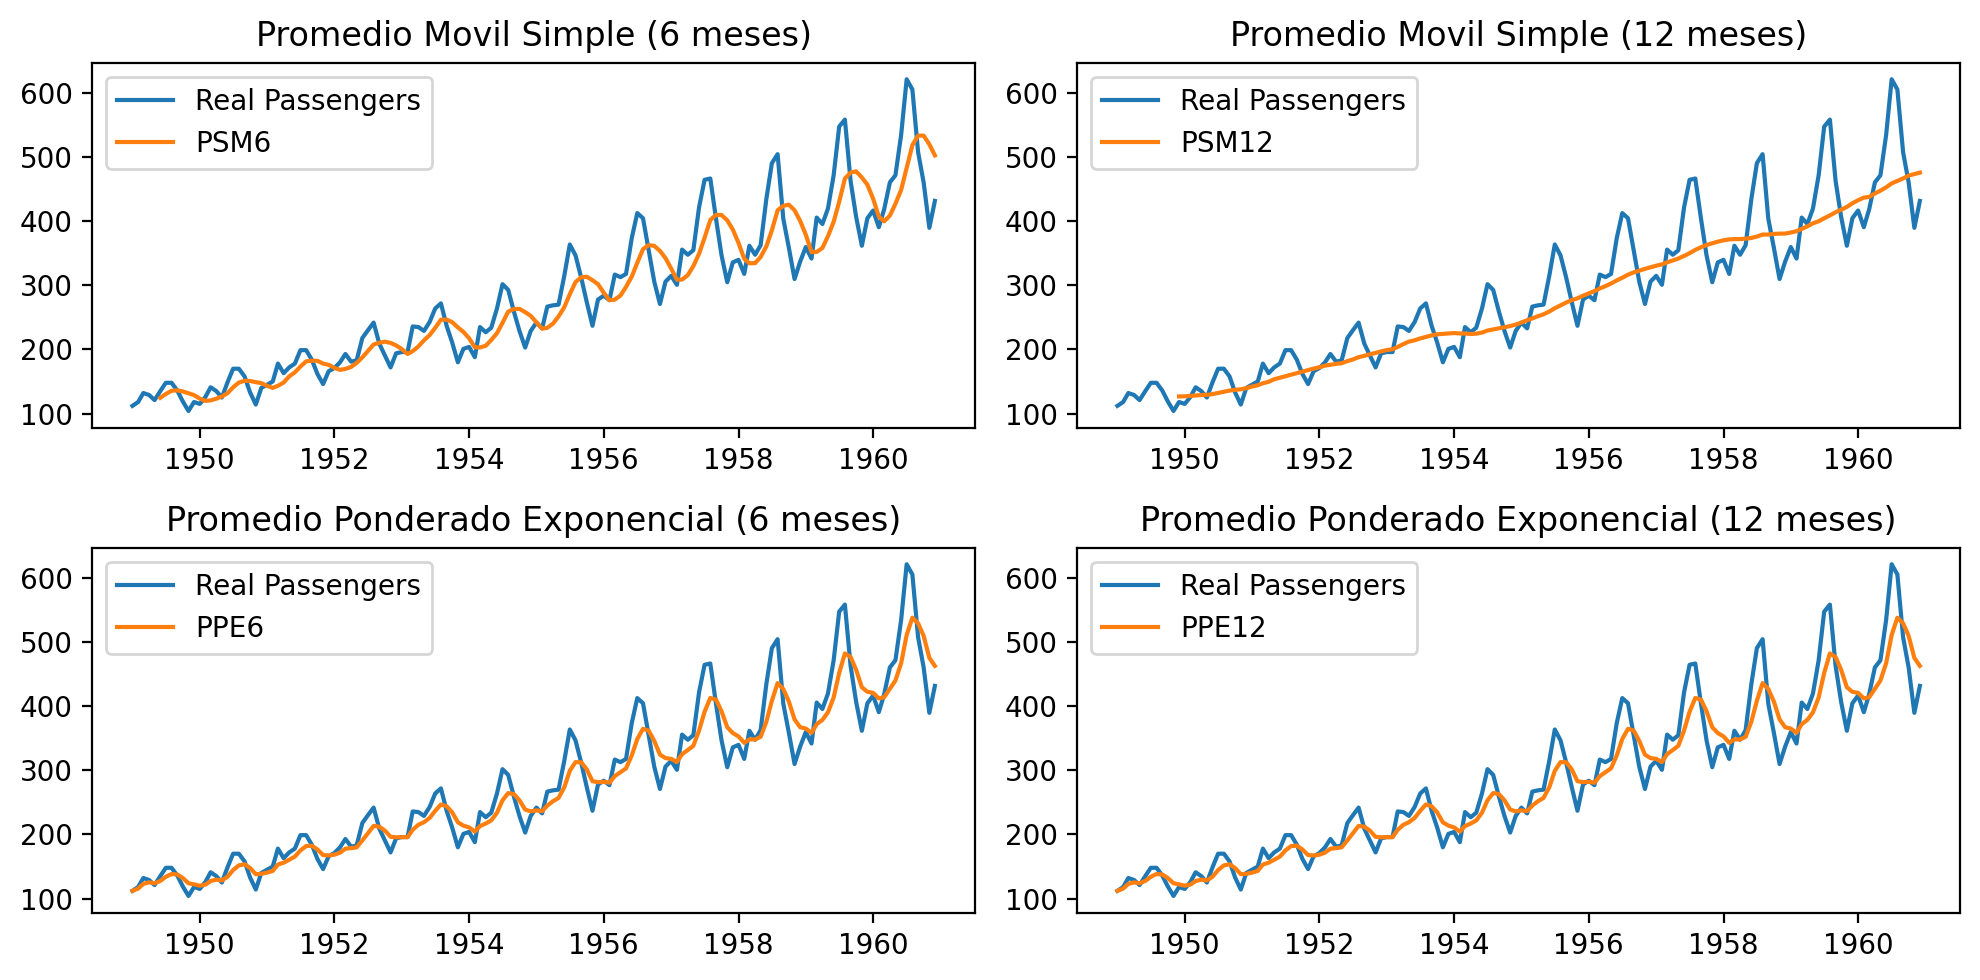

In [45]:
graficos,axes = plt.subplots(nrows=2, ncols=2,dpi=200, figsize=(10,5))
axes[0,0].plot(df_aerolinea["Passengers"], label="Real Passengers")
axes[0,0].plot(df_aerolinea["PSM6"], label="PSM6")
axes[0,0].set_title("Promedio Movil Simple (6 meses)")
axes[0,0].legend(loc='best') 
axes[0,1].plot(df_aerolinea["Passengers"], label="Real Passengers")
axes[0,1].plot(df_aerolinea["PSM12"], label="PSM12")
axes[0,1].set_title("Promedio Movil Simple (12 meses)")
axes[0,1].legend(loc='best') 
axes[1,0].plot(df_aerolinea["Passengers"], label="Real Passengers")
axes[1,0].plot(df_aerolinea["PPE6"], label="PPE6")
axes[1,0].set_title("Promedio Ponderado Exponencial (6 meses)")
axes[1,0].legend(loc='best') 
axes[1,1].plot(df_aerolinea["Passengers"], label="Real Passengers")
axes[1,1].plot(df_aerolinea["PPE12"], label="PPE12")
axes[1,1].set_title("Promedio Ponderado Exponencial (12 meses)")
axes[1,1].legend(loc='best') 
plt.tight_layout()
plt.tight_layout()
plt.show()